Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Removendo duplicatas


In [2]:
apps = pd.read_csv('googleplaystore.csv', sep=',')
apps = apps.drop_duplicates(subset='App', keep='first')
display(apps)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Gráfico de barras: top 5 apps por número de instalação

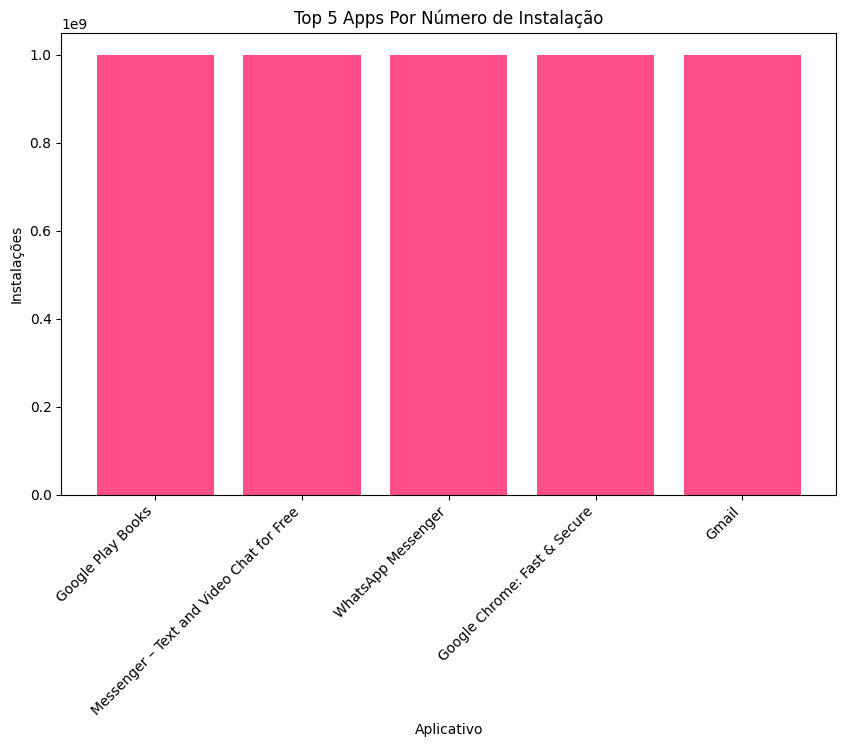

In [27]:
apps['Installs'] = apps['Installs'].astype(str)

apps['Installs'] = apps['Installs'].str.replace('Free', '0')  
apps['Installs'] = apps['Installs'].str.replace(',', '') 
apps['Installs'] = apps['Installs'].str.replace('+', '')

apps['Installs'] = apps['Installs'].astype(int)

top_apps = apps.nlargest(5, 'Installs')

plt.figure(figsize=(10, 6))
plt.bar(top_apps['App'], top_apps['Installs'], color='#FF4E88')
plt.title('Top 5 Apps Por Número de Instalação')
plt.xlabel('Aplicativo')
plt.ylabel('Instalações')
plt.xticks(rotation=45, ha='right')
plt.show()

Categorias dos apps de acordo com a frequência em que eles aparecem

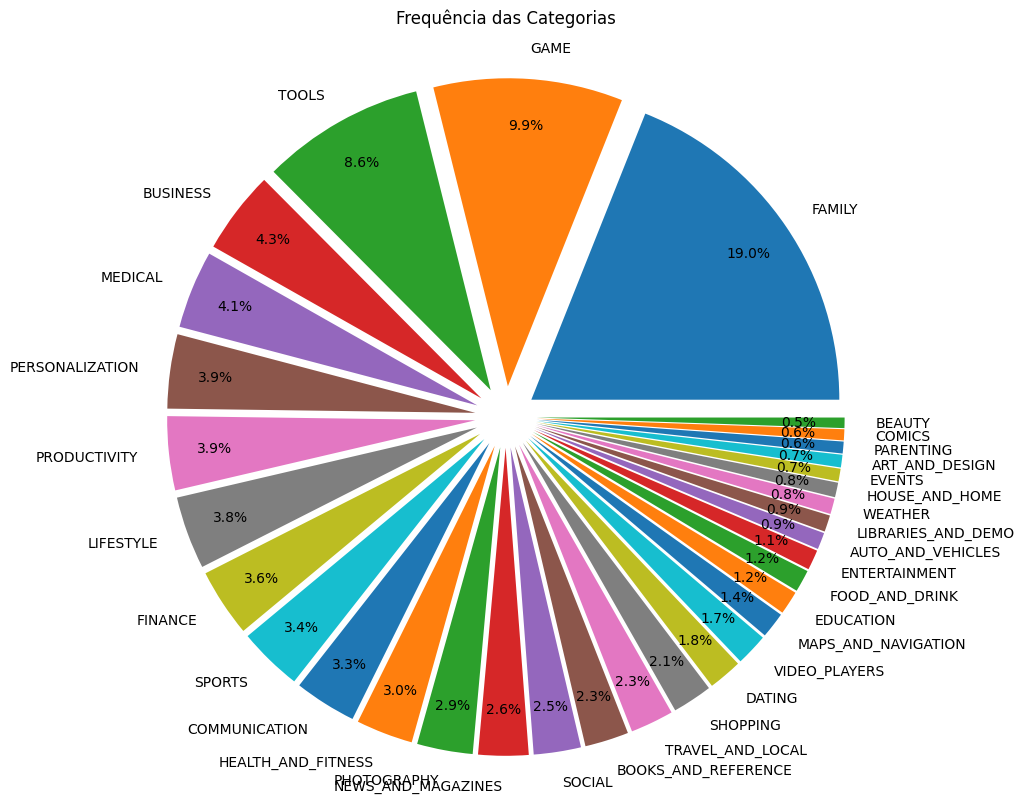

In [28]:
apps = apps[apps['Category'] != '1.9']
frequencia = apps['Category'].value_counts()

categorias = frequencia.index
tamanhos = frequencia.values

plt.figure(figsize=(15, 10))
explode = [0.1] * len(categorias)
plt.pie(tamanhos, labels=categorias, autopct='%1.1f%%', explode=explode, labeldistance=1.1, pctdistance=0.85)
plt.title('Frequência das Categorias')
plt.show()

Aplicativo mais caro

In [29]:
apps['Price'] = apps['Price'].astype(str)
apps['Price'] = apps['Price'].replace({'$': '', 'Free': '0'}, regex=True)
apps['Price'] = apps['Price'].str.replace(',', '')

apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps = apps.dropna(subset=['Price'])

app_mais_caro = apps.loc[apps['Price'].idxmax()]

print(f"Aplicativo mais caro: {app_mais_caro['App']} - ${app_mais_caro['Price']:.2f}")

Aplicativo mais caro: I'm Rich - Trump Edition - $400.00


Aplicativos classifiicados como Mature 17+

In [30]:
mature = 'Mature 17+'
apps_mature = apps[apps['Content Rating'] == mature]
contagem = apps_mature.shape[0]

print(f"{contagem} aplicativos são classificados como Mature 17+")


393 aplicativos são classificados como Mature 17+


Top 10 apps por número de reviews

In [31]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'])

top_10 = apps.nlargest(10, 'Reviews')[['App', 'Reviews']]

print("Top 10 aplicativos por número de reviews:")
print(top_10)

Top 10 aplicativos por número de reviews:
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


Total de aplicativos sem avaliações

In [22]:
sem_avaliacao = len(apps[apps['Rating'].isnull()])
print(f'Total de aplicativos sem avaliações: {sem_avaliacao}')

Total de aplicativos sem avaliações: 1463


Gênero mais baixado

In [23]:
installs_por_categoria = apps.groupby('Category')['Installs'].sum()

genero_mais_baixado = installs_por_categoria.idxmax()
instalacoes = installs_por_categoria.max()

print(f"Gênero mais baixado: {genero_mais_baixado} com {instalacoes:.0f} instalações")


Gênero mais baixado: GAME com 13878924415 instalações


Avaliação vs. Preço

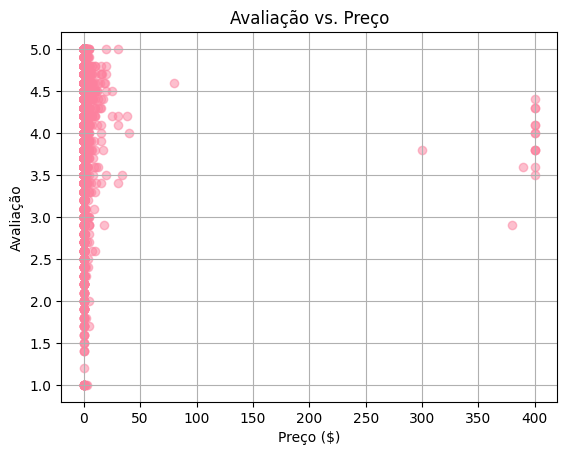

In [32]:
plt.scatter(apps['Price'], apps['Rating'], alpha=0.5, color='#FC819E')
plt.title('Avaliação vs. Preço')
plt.xlabel('Preço ($)')
plt.ylabel('Avaliação')
plt.grid(True)
plt.show()

Top 10 Gêneros Mais Baixados

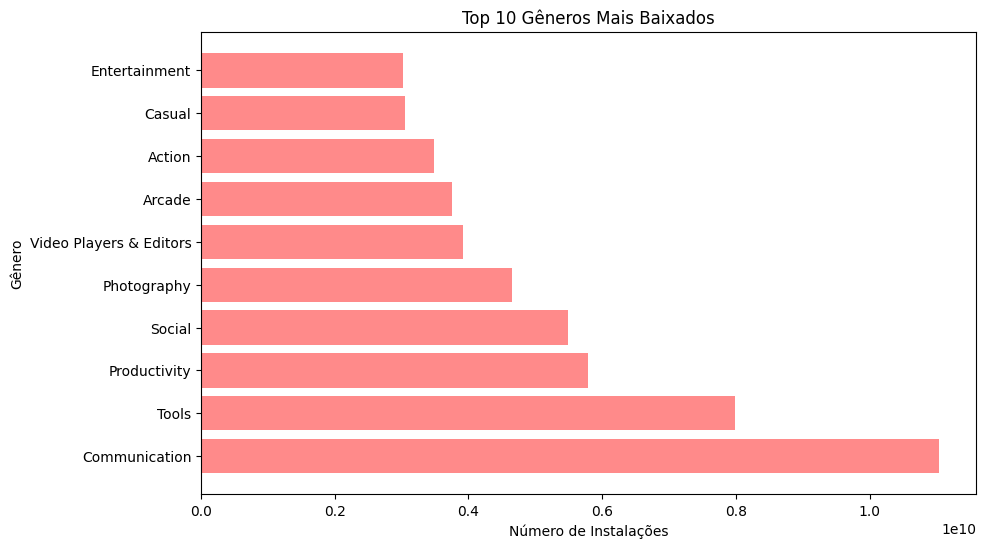

In [33]:
apps['Installs'] = apps['Installs'].astype(str)

apps['Installs'] = apps['Installs'].replace({'Free': '0'}, regex=True)
apps['Installs'] = apps['Installs'].str.replace(',', '')
apps['Installs'] = apps['Installs'].str.replace('+', '')

apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

apps = apps.dropna(subset=['Installs'])

top_generos = apps.groupby('Genres')['Installs'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
plt.barh(top_generos.index, top_generos.values, color='#FF8A8A')
plt.title('Top 10 Gêneros Mais Baixados')
plt.xlabel('Número de Instalações')
plt.ylabel('Gênero')
plt.show()